Some assholes reported this repository as a "porn", so only highly blurred images are here, sorry

In [1]:
%matplotlib inline

In [2]:
import os
import glob
import time
import timeit
import dlib
from matplotlib import pylab as pylab
from matplotlib import pyplot as plt
from matplotlib import patches as patches
from skimage import io
from skimage.filters import gaussian

In [3]:
pylab.rcParams['figure.figsize'] = 4, 3

In [4]:
faces_folder = "pics"
detector_file = "boobs.svm"

# Prepare detector

In [5]:
def train():
    options = dlib.simple_object_detector_training_options()
    options.add_left_right_image_flips = True
    options.C = 5
    options.num_threads = 4
    options.be_verbose = True
    options.detection_window_size = 6400

    training_xml_path = os.path.join(faces_folder, "train", "training-single.xml")
    dlib.train_simple_object_detector(training_xml_path, detector_file, options)

    return dlib.test_simple_object_detector(training_xml_path, detector_file)

In [6]:
#statistics = train()
#print("Learn statistics {}".format(statistics))

# Load detector

In [7]:
detector = dlib.simple_object_detector(detector_file)

In [8]:
# Show HOG detector 
win_det = dlib.image_window()
win_det.set_image(detector)

# Test detector on learn set 

In [9]:
def test(detector, folder):
    test_path = os.path.join(folder, "*.jpg")
    test_files = glob.glob(test_path)
    
    for f in test_files:
        img = io.imread(f)
        img_blurred = gaussian(img, sigma=15, multichannel=True)
        dets = detector(img)
        
        plt.subplot()
        
        imgplot = plt.imshow(img_blurred)
        imgplot.set_interpolation('bicubic')
        imgplot.make_image(img_blurred, magnification=0.2)
        
        plt.title(f)
        plt.xticks([])
        plt.yticks([])
        
        currentAxis = plt.gca()
        for k, d in enumerate(dets):
            currentAxis.add_patch(patches.Rectangle(
                (d.left(), d.top()), d.right() - d.left(), d.bottom() - d.top(), fill=None, alpha=1, edgecolor='yellow'))
    
        plt.tight_layout()
        plt.show()

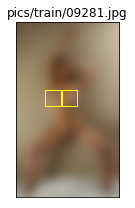

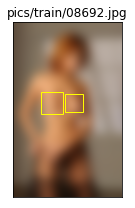

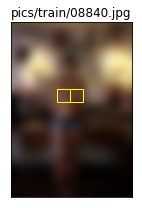

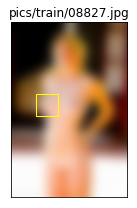

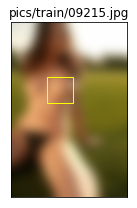

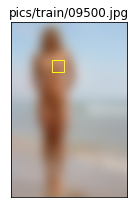

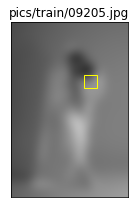

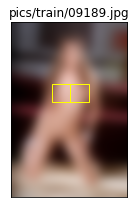

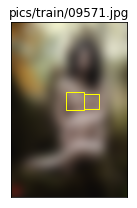

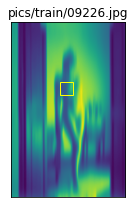

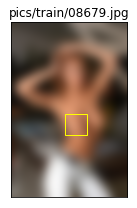

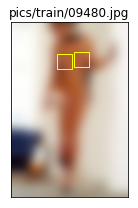

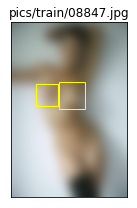

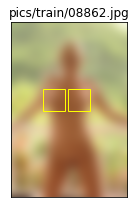

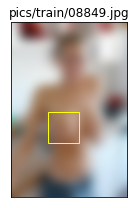

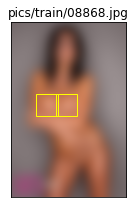

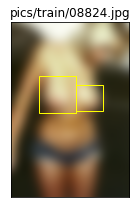

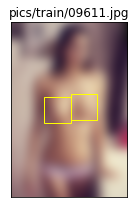

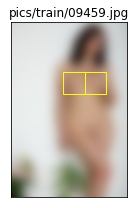

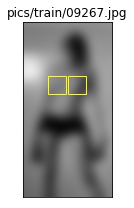

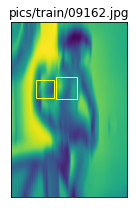

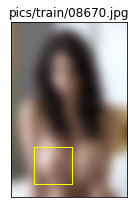

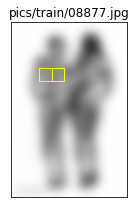

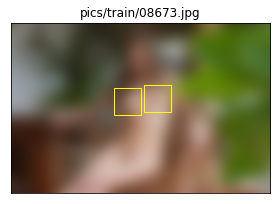

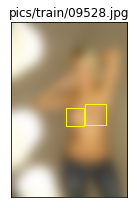

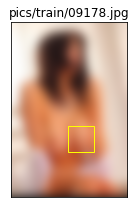

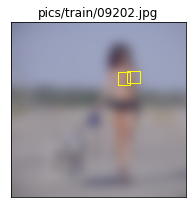

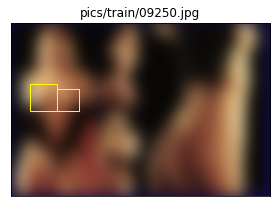

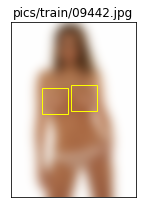

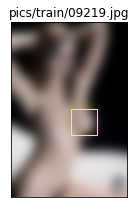

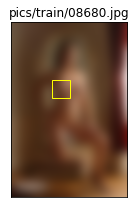

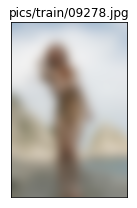

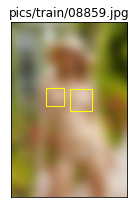

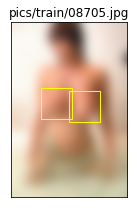

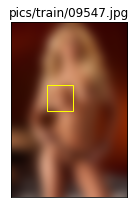

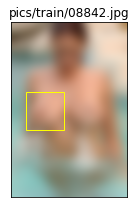

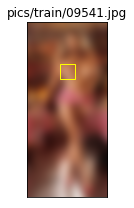

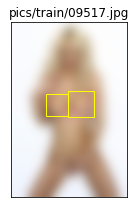

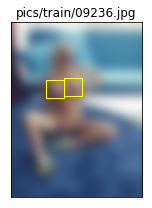

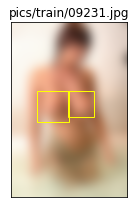

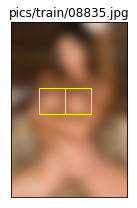

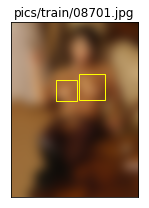

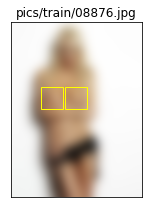

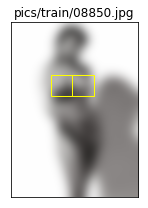

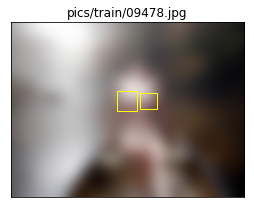

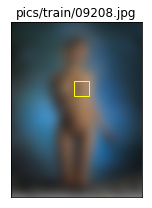

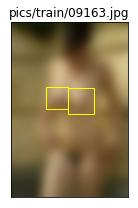

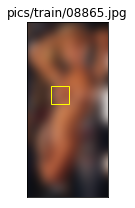

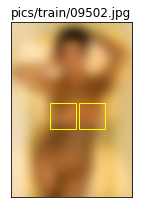

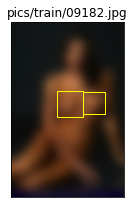

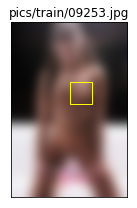

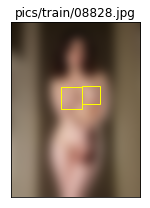

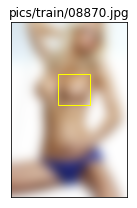

In [10]:
test(detector, os.path.join(faces_folder, "train"))

# Test detector on test set

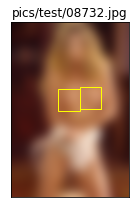

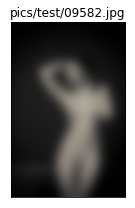

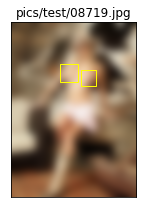

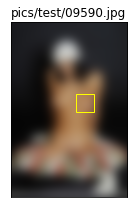

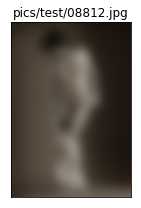

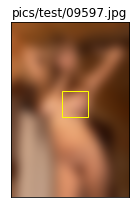

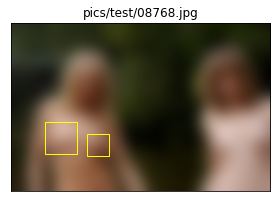

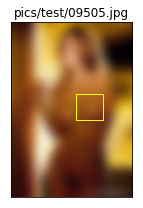

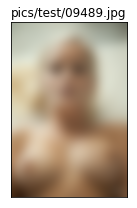

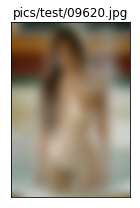

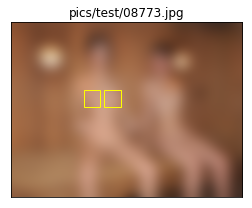

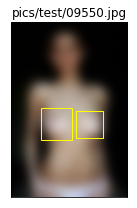

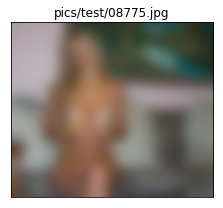

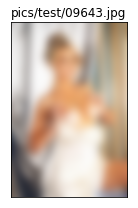

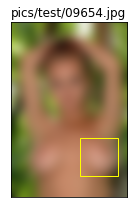

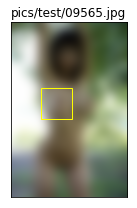

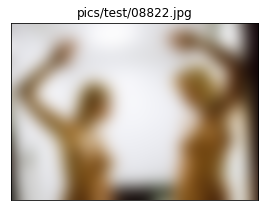

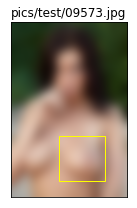

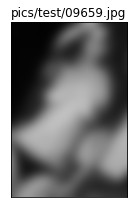

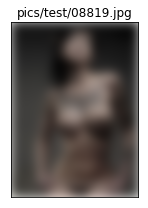

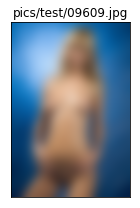

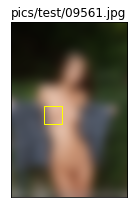

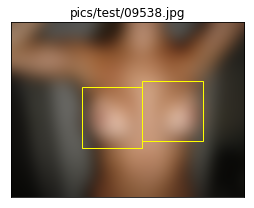

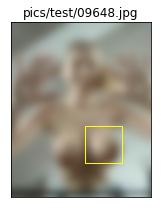

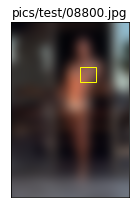

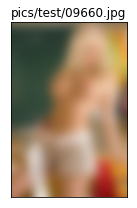

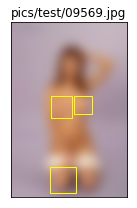

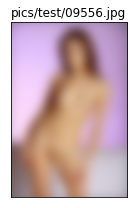

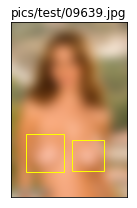

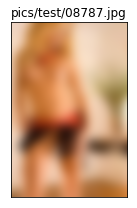

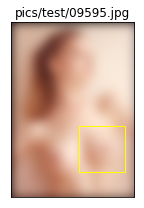

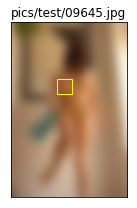

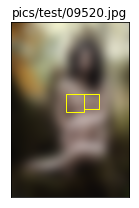

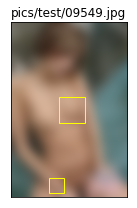

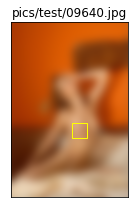

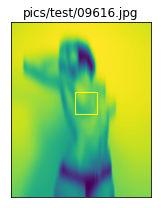

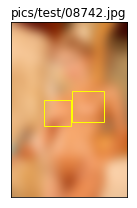

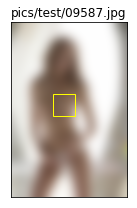

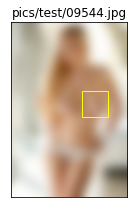

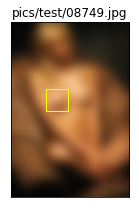

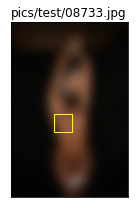

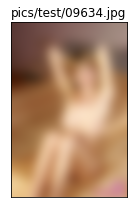

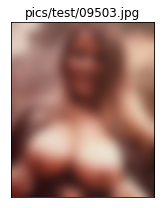

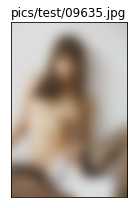

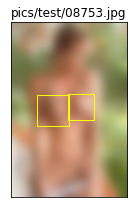

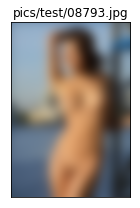

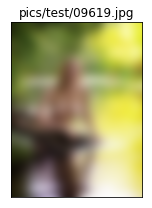

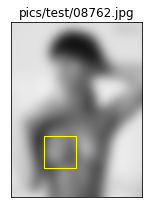

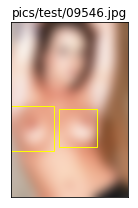

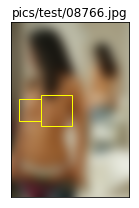

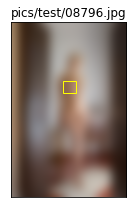

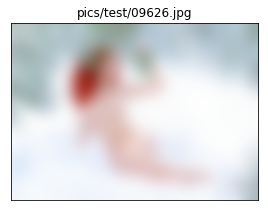

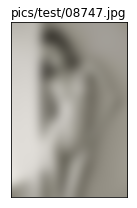

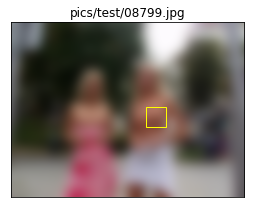

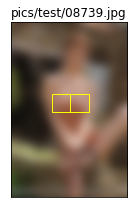

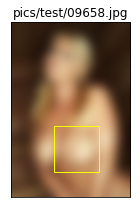

In [11]:
test(detector, os.path.join(faces_folder, "test"))